In [79]:
from bs4 import BeautifulSoup

In [80]:
soup = BeautifulSoup(open("1.html",encoding="utf8"), "html.parser")

In [81]:
movie_containers = soup.find_all('div' , class_ = 'review-container')
print(type(movie_containers))
print(len(movie_containers))

<class 'bs4.element.ResultSet'>
1124


In [82]:
first_movie = movie_containers[0]
first_movie.a.text

" Finally, a Show that stays true to it's written roots\n"

In [83]:
temp = first_movie.span.text

In [84]:
temp

'\n\n\n\n\n\n9/10\n'

In [85]:
# Lists to store the scraped data in
reviews = []
ratings = []

# Extract data from individual movie container
for container in movie_containers:
    
    #review
    review = container.a.text
    reviews.append(review)
    
    #rating
    rating = container.span.text
    ratings.append(rating)
   

In [86]:
import pandas as pd
import numpy as np

test_df = pd.DataFrame({'Review': reviews,'Rating': ratings})
print(test_df.info())
test_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1124 entries, 0 to 1123
Data columns (total 2 columns):
Review    1124 non-null object
Rating    1124 non-null object
dtypes: object(2)
memory usage: 17.6+ KB
None


Review               Rating
0   Finally, a Show that stays true to it's writt...   \n\n\n\n\n\n9/10\n
1                            Excellent adaptation.\n  \n\n\n\n\n\n10/10\n
2     One of the most stunning shows on television\n  \n\n\n\n\n\n10/10\n
3                 Lord of the Rings - I think not!\n  \n\n\n\n\n\n10/10\n
4                 Fantasy has never seemed so real\n  \n\n\n\n\n\n10/10\n

In [87]:
test_df.loc[:, 'Rating'] = test_df['Rating'].str[6:8]

In [88]:
test_df.loc[:, 'Rating'] = test_df['Rating'].str.replace('/', '')
test_df.loc[:, 'Review'] = test_df['Review'].str.replace('\n', '')
test_df.loc[:, 'Rating'] = test_df['Rating'].str.replace('-', '')

In [89]:
test_df['Review'].head()

0     Finally, a Show that stays true to it's writt...
1                                Excellent adaptation.
2         One of the most stunning shows on television
3                     Lord of the Rings - I think not!
4                     Fantasy has never seemed so real
Name: Review, dtype: object

In [90]:
import re
def split_it(rating):
    return re.sub('[a-zA-Z]+','NaN', rating)

In [91]:
test_df['Rating'] = test_df['Rating'].apply(split_it)

In [92]:
test_df = test_df[test_df.Rating.str.contains("NaN") == False]

In [93]:
test_df['Rating'] = test_df['Rating'].apply(pd.to_numeric)

In [94]:
test_df.to_csv('out.csv', index=False, header=False)

In [95]:
import matplotlib.pyplot as plt
%matplotlib inline

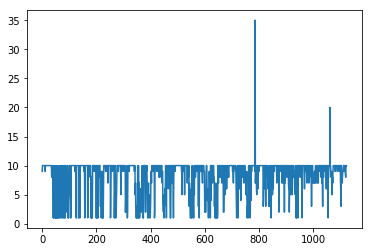

In [96]:
plt.plot(test_df['Rating'])

In [97]:
test_df = test_df[test_df.Rating <= 10]

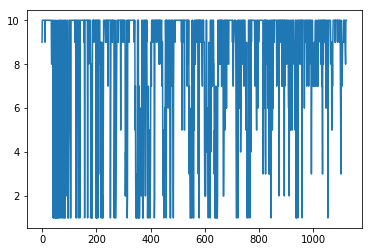

In [98]:
plt.plot(test_df['Rating'])

In [99]:
test_df.describe()

Rating
count  1065.000000
mean      8.071362
std       3.015090
min       1.000000
25%       7.000000
50%      10.000000
75%      10.000000
max      10.000000

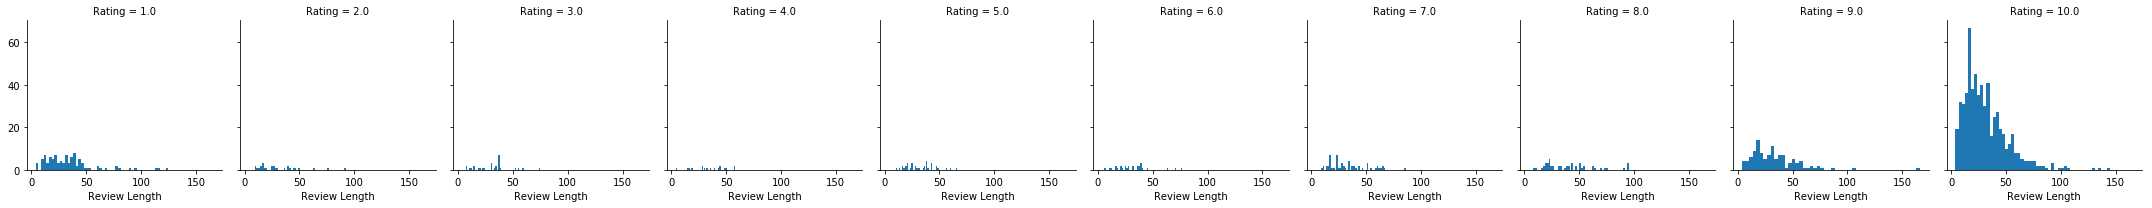

In [100]:
import seaborn as sns

test_df['Review']=test_df['Review'].astype(str)
test_df['Review Length']=test_df['Review'].apply(len)

g = sns.FacetGrid(data=test_df, col='Rating')
g.map(plt.hist, 'Review Length', bins=50)

In [101]:
test_df.head()

Review  Rating  Review Length
0   Finally, a Show that stays true to it's writt...     9.0             54
1                              Excellent adaptation.    10.0             22
2       One of the most stunning shows on television    10.0             45
3                   Lord of the Rings - I think not!    10.0             33
4                   Fantasy has never seemed so real    10.0             33

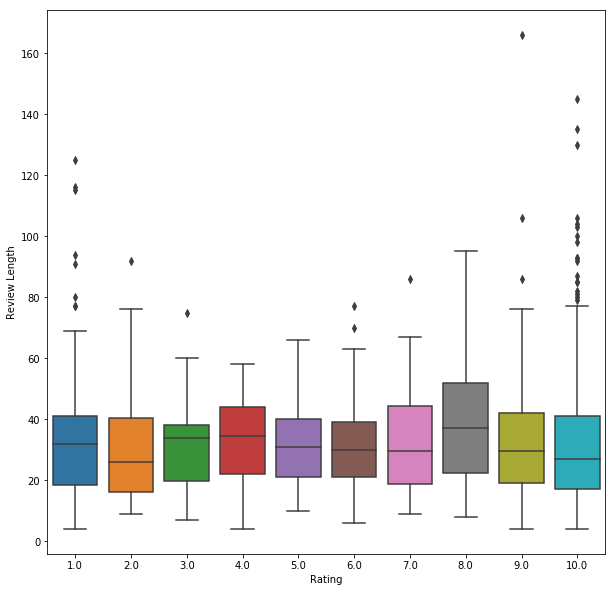

In [102]:
plt.figure(figsize=(10,10))
sns.boxplot(x='Rating', y='Review Length', data=test_df)

In [103]:
from collections import Counter
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
import nltk
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize

In [104]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Akshay\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [105]:
a = test_df['Review'].str.lower().str.cat(sep=' ')



In [106]:
# removes punctuation,numbers and returns list of words
b = re.sub('[^A-Za-z]+', ' ', a)

In [107]:
#remove all the stopwords from the text
stop_words = list(get_stop_words('en'))         
nltk_words = list(stopwords.words('english'))   
stop_words.extend(nltk_words)

newStopWords = ['game','thrones', 'bran', 'stark', 'dragons']
stop_words.extend(newStopWords)

In [108]:
word_tokens = word_tokenize(b)

In [109]:

len(word_tokens)

6030

In [110]:
filtered_sentence = []
for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)

In [111]:
len(filtered_sentence)

3599

In [112]:
# Remove characters which have length less than 2  
without_single_chr = [word for word in filtered_sentence if len(word) > 2]

# Remove numbers
cleaned_data_title = [word for word in without_single_chr if not word.isnumeric()]   

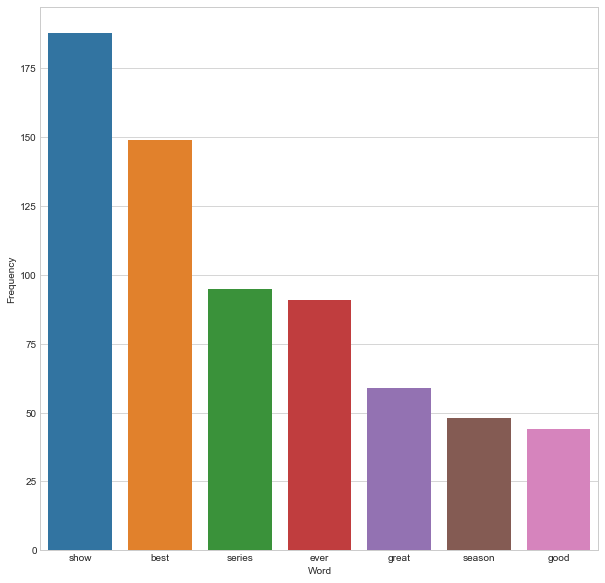

In [113]:
top_N = 100
word_dist = nltk.FreqDist(cleaned_data_title)
rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x="Word",y="Frequency", data=rslt.head(7))

In [114]:
from wordcloud import WordCloud, STOPWORDS

In [115]:
def wc(data,bgcolor,title):
    plt.figure(figsize = (100,100))
    wc = WordCloud(background_color = bgcolor, max_words = 1000,  max_font_size = 50)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')

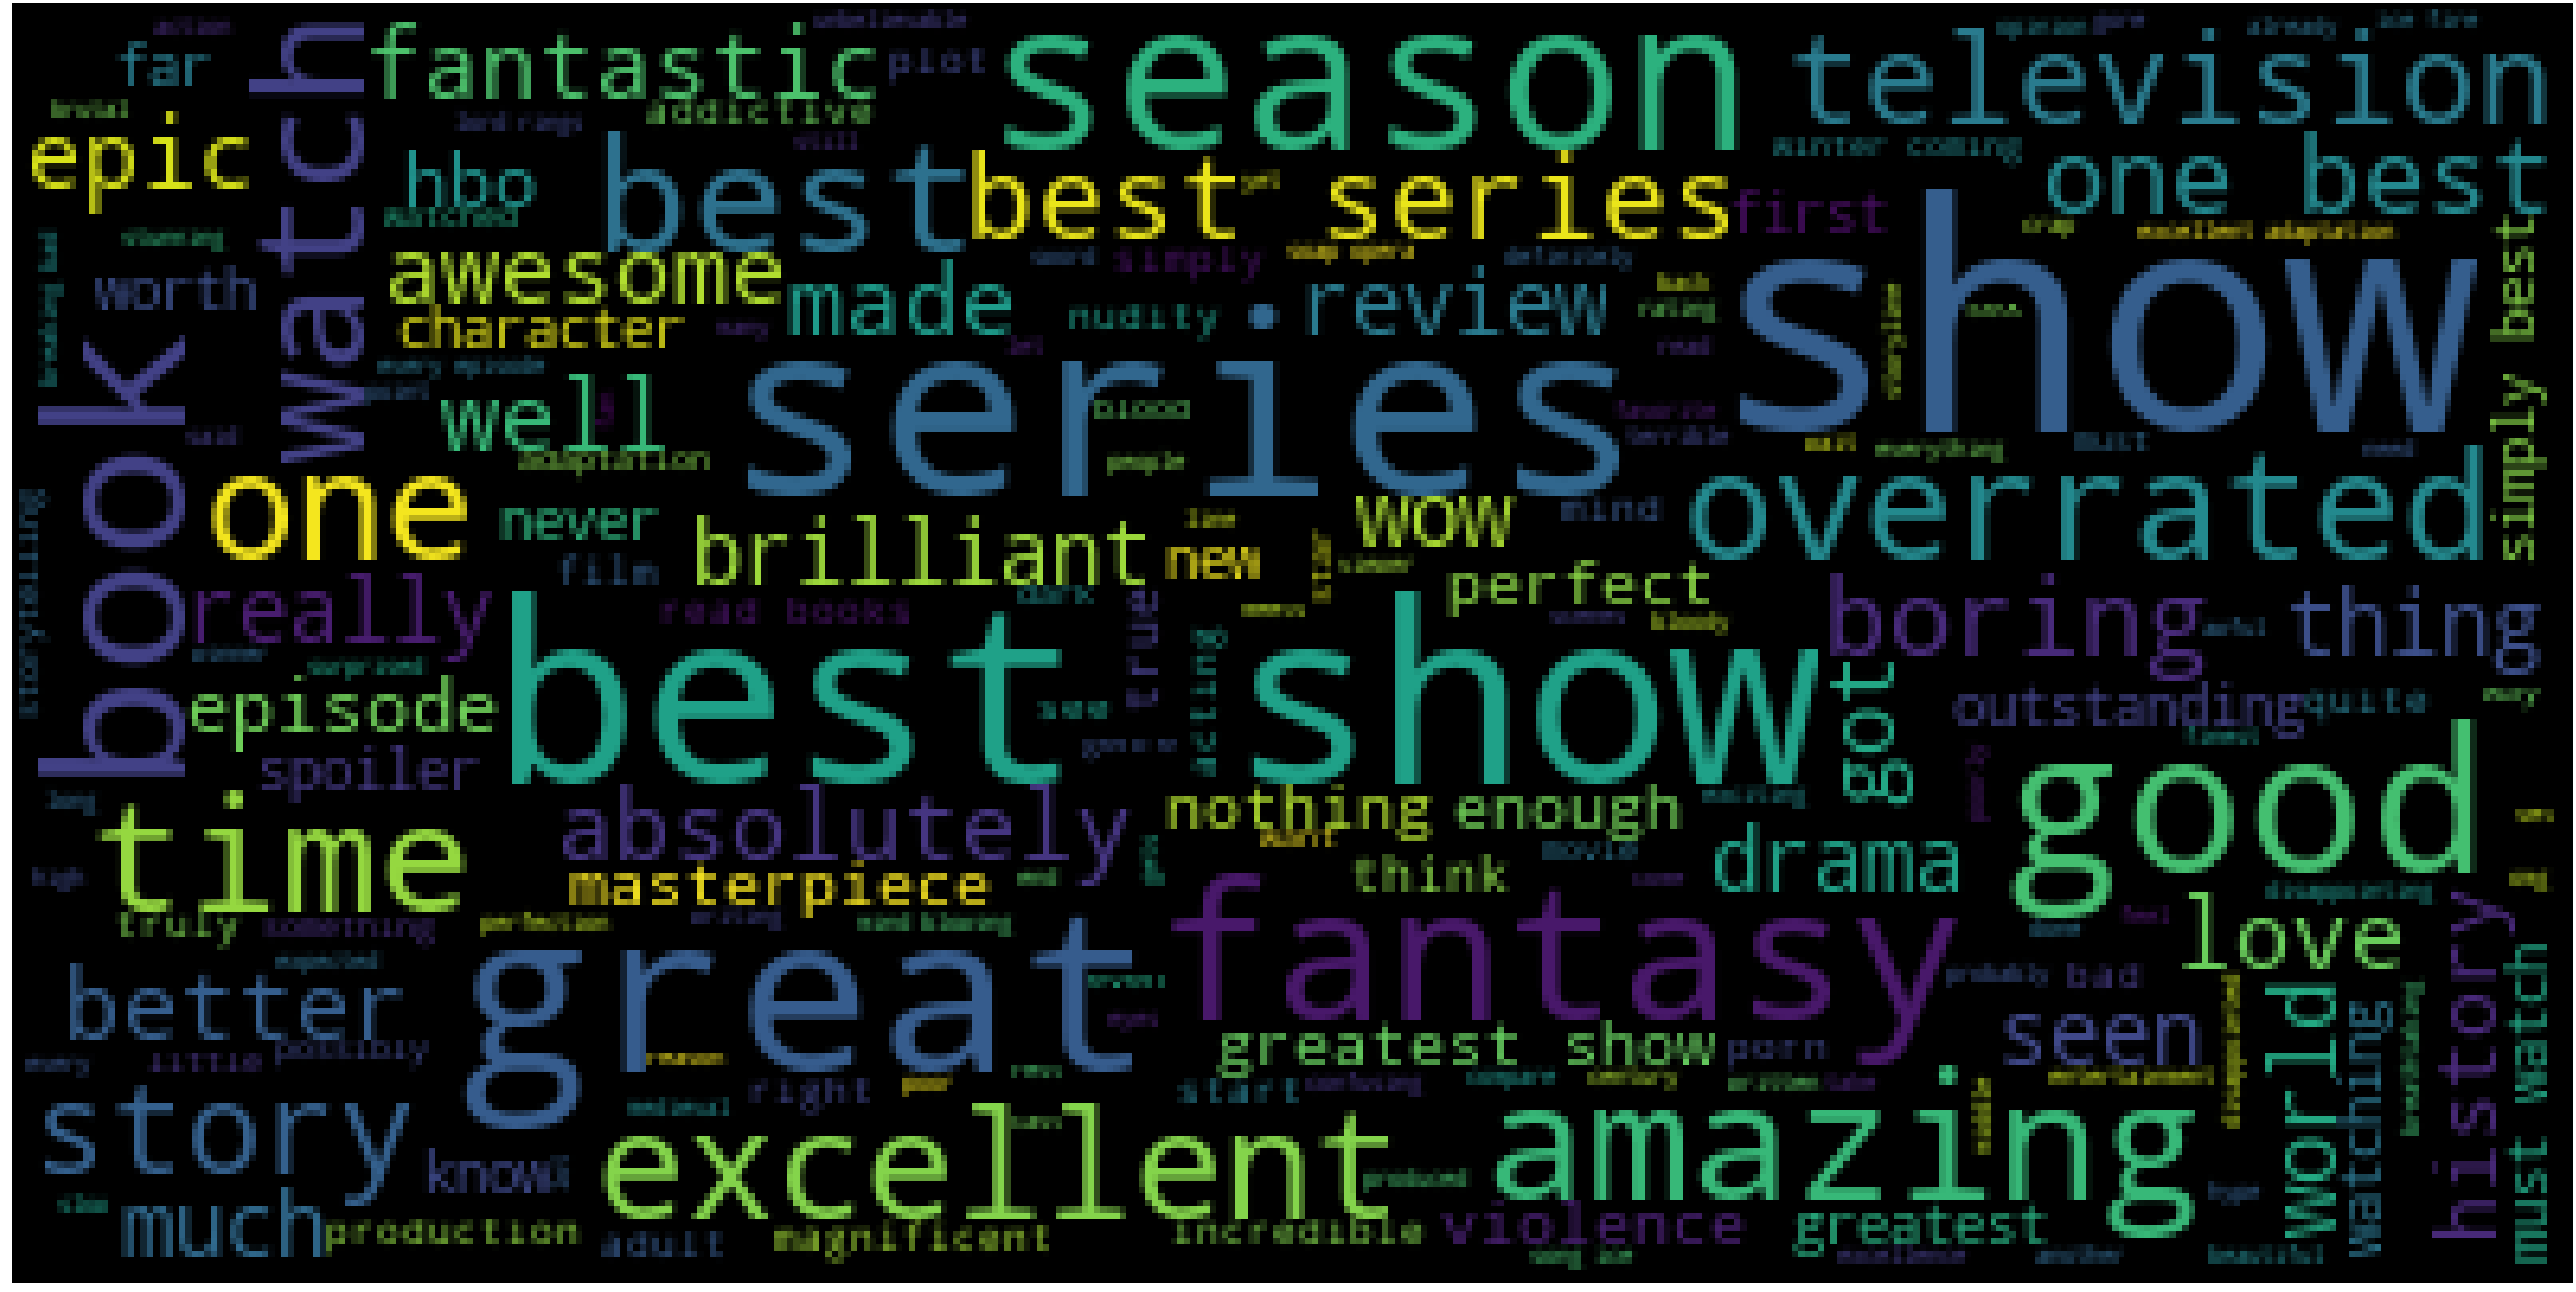

In [116]:
wc(cleaned_data_title,'black','Most Used Words')

In [117]:
from textblob import TextBlob

bloblist_desc = list()

df_review_str=test_df['Review'].astype(str)

In [118]:
for row in df_review_str:
    blob = TextBlob(row)
    bloblist_desc.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
    df_polarity_desc = pd.DataFrame(bloblist_desc, columns = ['Review','sentiment','polarity'])

In [119]:
df_polarity_desc.head()

Review  sentiment  polarity
0   Finally, a Show that stays true to it's writt...      0.175     0.825
1                              Excellent adaptation.      1.000     1.000
2       One of the most stunning shows on television      0.500     0.750
3                   Lord of the Rings - I think not!      0.000     0.000
4                   Fantasy has never seemed so real      0.200     0.300

In [120]:
def f(df_polarity_desc):
    if df_polarity_desc['sentiment'] >= 0:
        val = "Positive Review"
    elif df_polarity_desc['sentiment'] >= -0.09:
        val = "Neutral Review"
    else:
        val = "Negative Review"
    return val

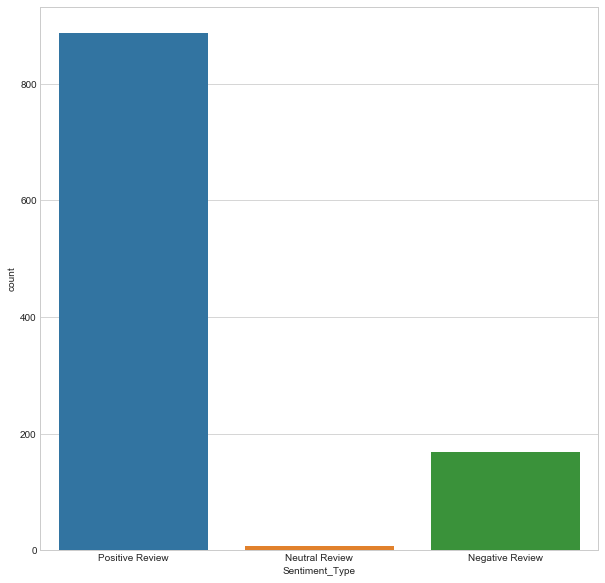

In [121]:
df_polarity_desc['Sentiment_Type'] = df_polarity_desc.apply(f, axis=1)

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.countplot(x="Sentiment_Type", data=df_polarity_desc)

In [122]:
positive_reviews=df_polarity_desc[df_polarity_desc['Sentiment_Type']=='Positive Review']
negative_reviews=df_polarity_desc[df_polarity_desc['Sentiment_Type']=='Negative Review']

In [123]:
negative_reviews.head()

Review  sentiment  polarity  \
15                       Heads up for GAME OF THRONES  -0.400000  0.400000   
22   As expected, some will love it, some will hat...  -0.133333  0.633333   
36   Possibly the worst storyline I will ever enco...  -0.500000  1.000000   
42                  On finding Game of Thrones on VHS  -0.400000  0.400000   
43                                 Unbelievably awful  -1.000000  1.000000   

     Sentiment_Type  
15  Negative Review  
22  Negative Review  
36  Negative Review  
42  Negative Review  
43  Negative Review

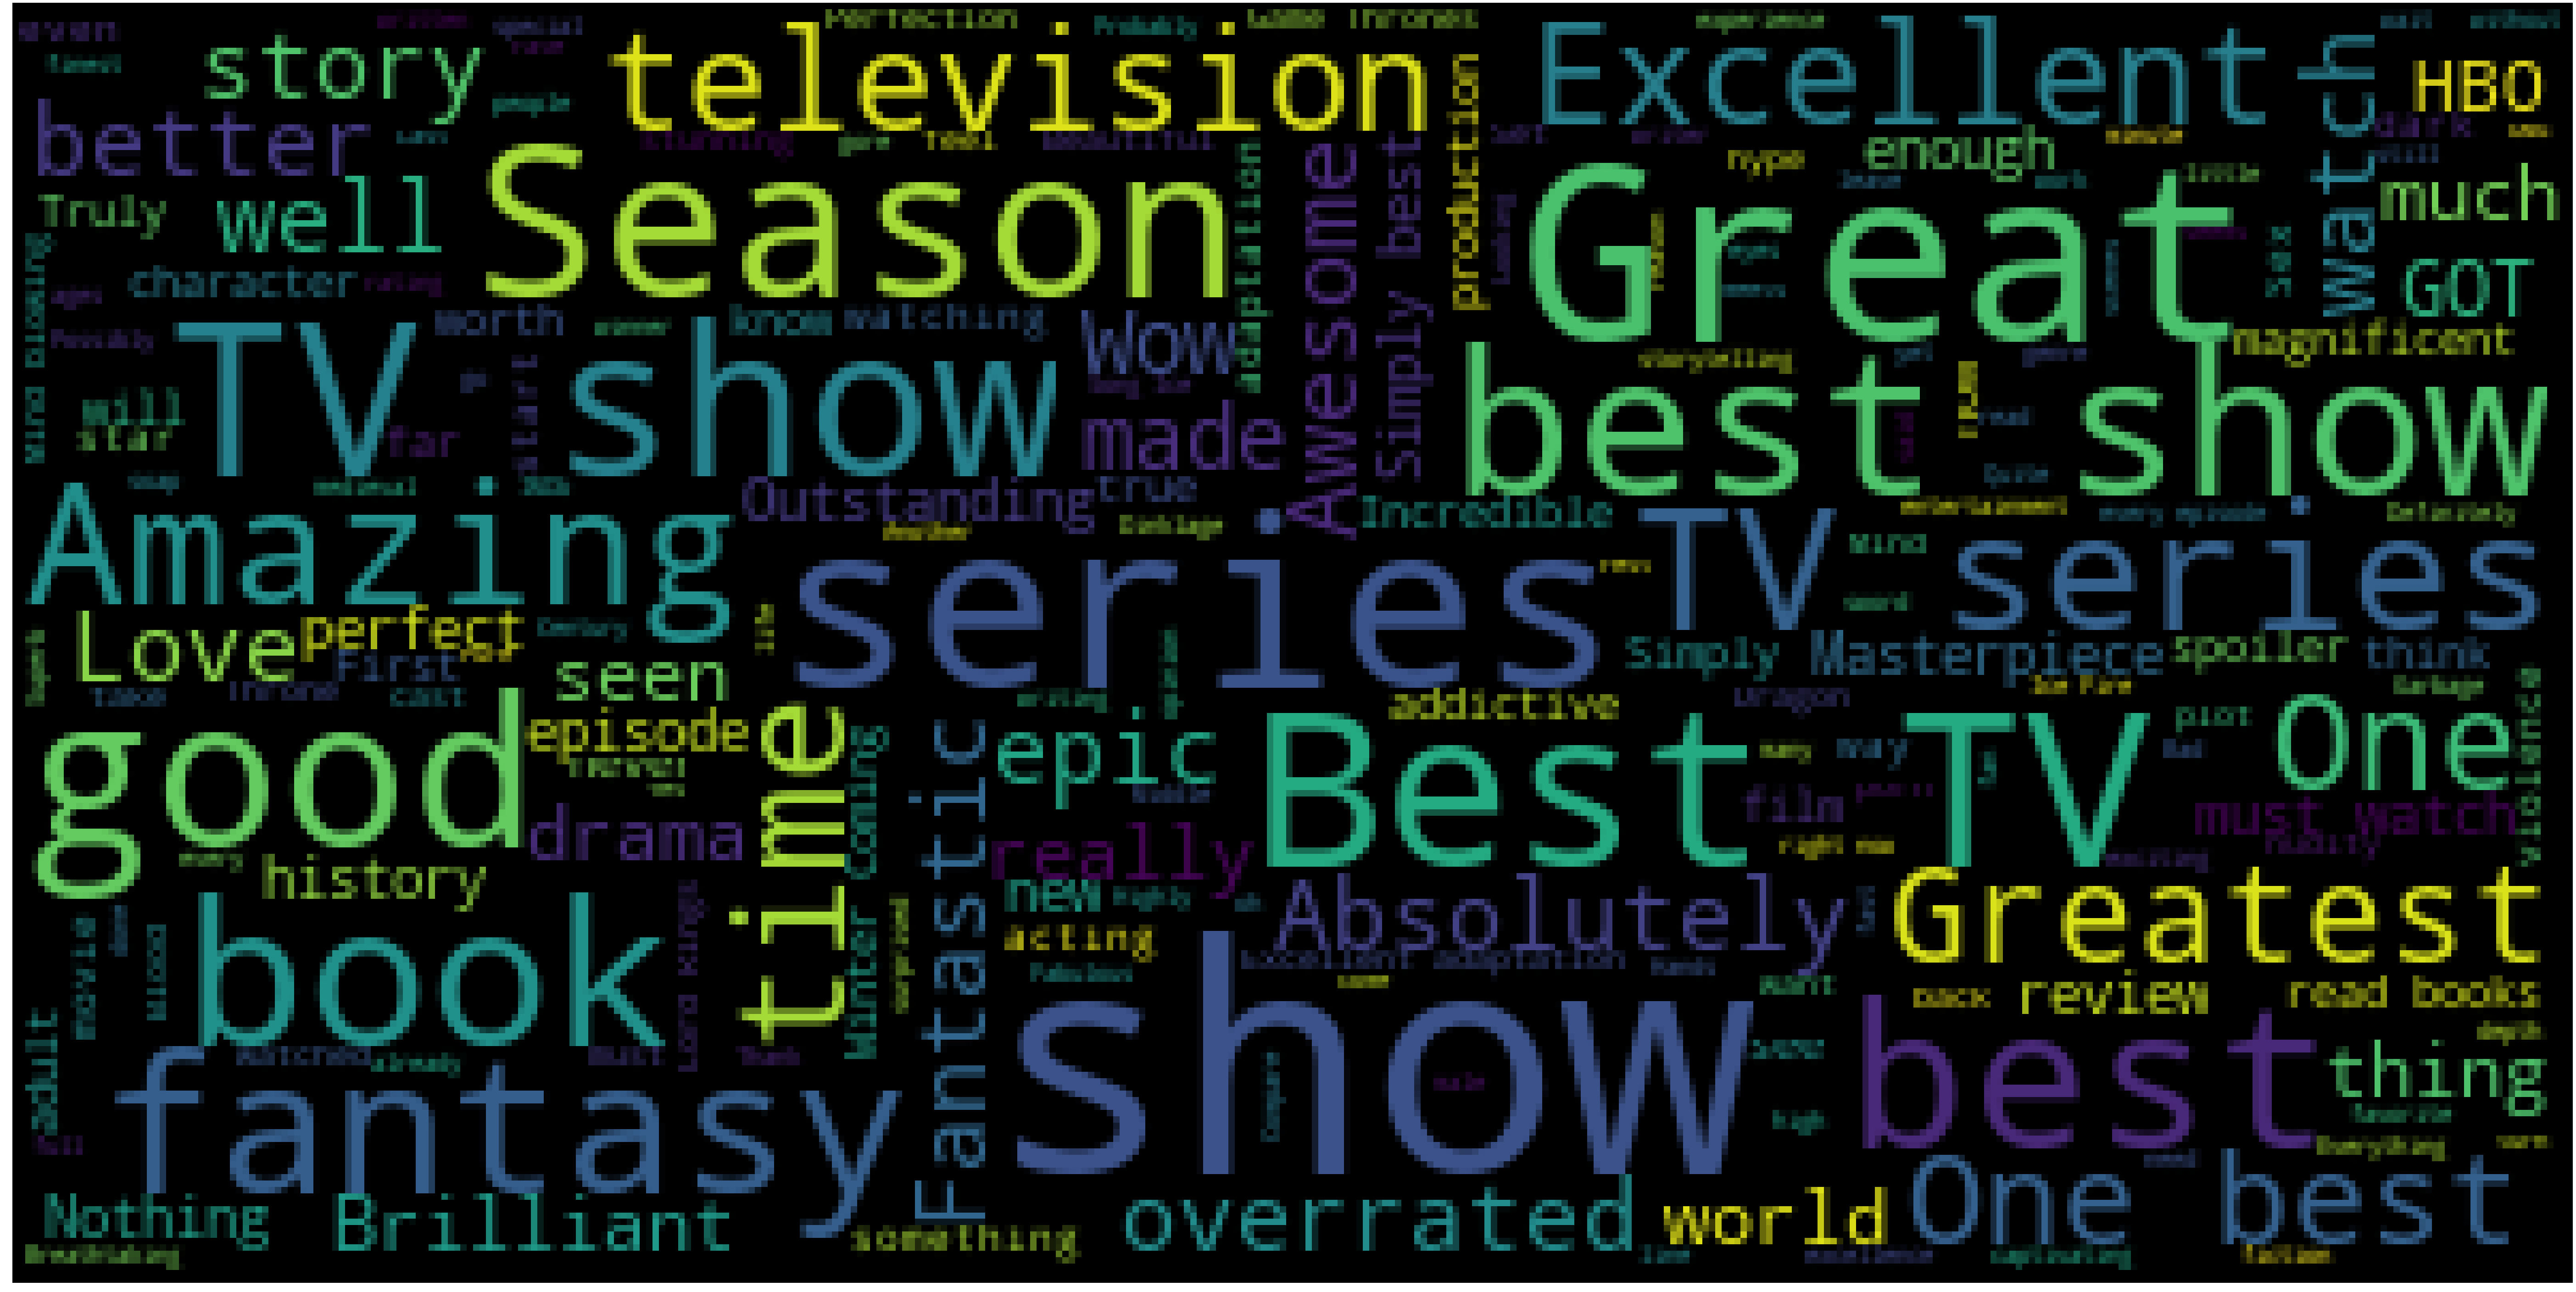

In [124]:
wc(positive_reviews['Review'],'black','Most Used Words')

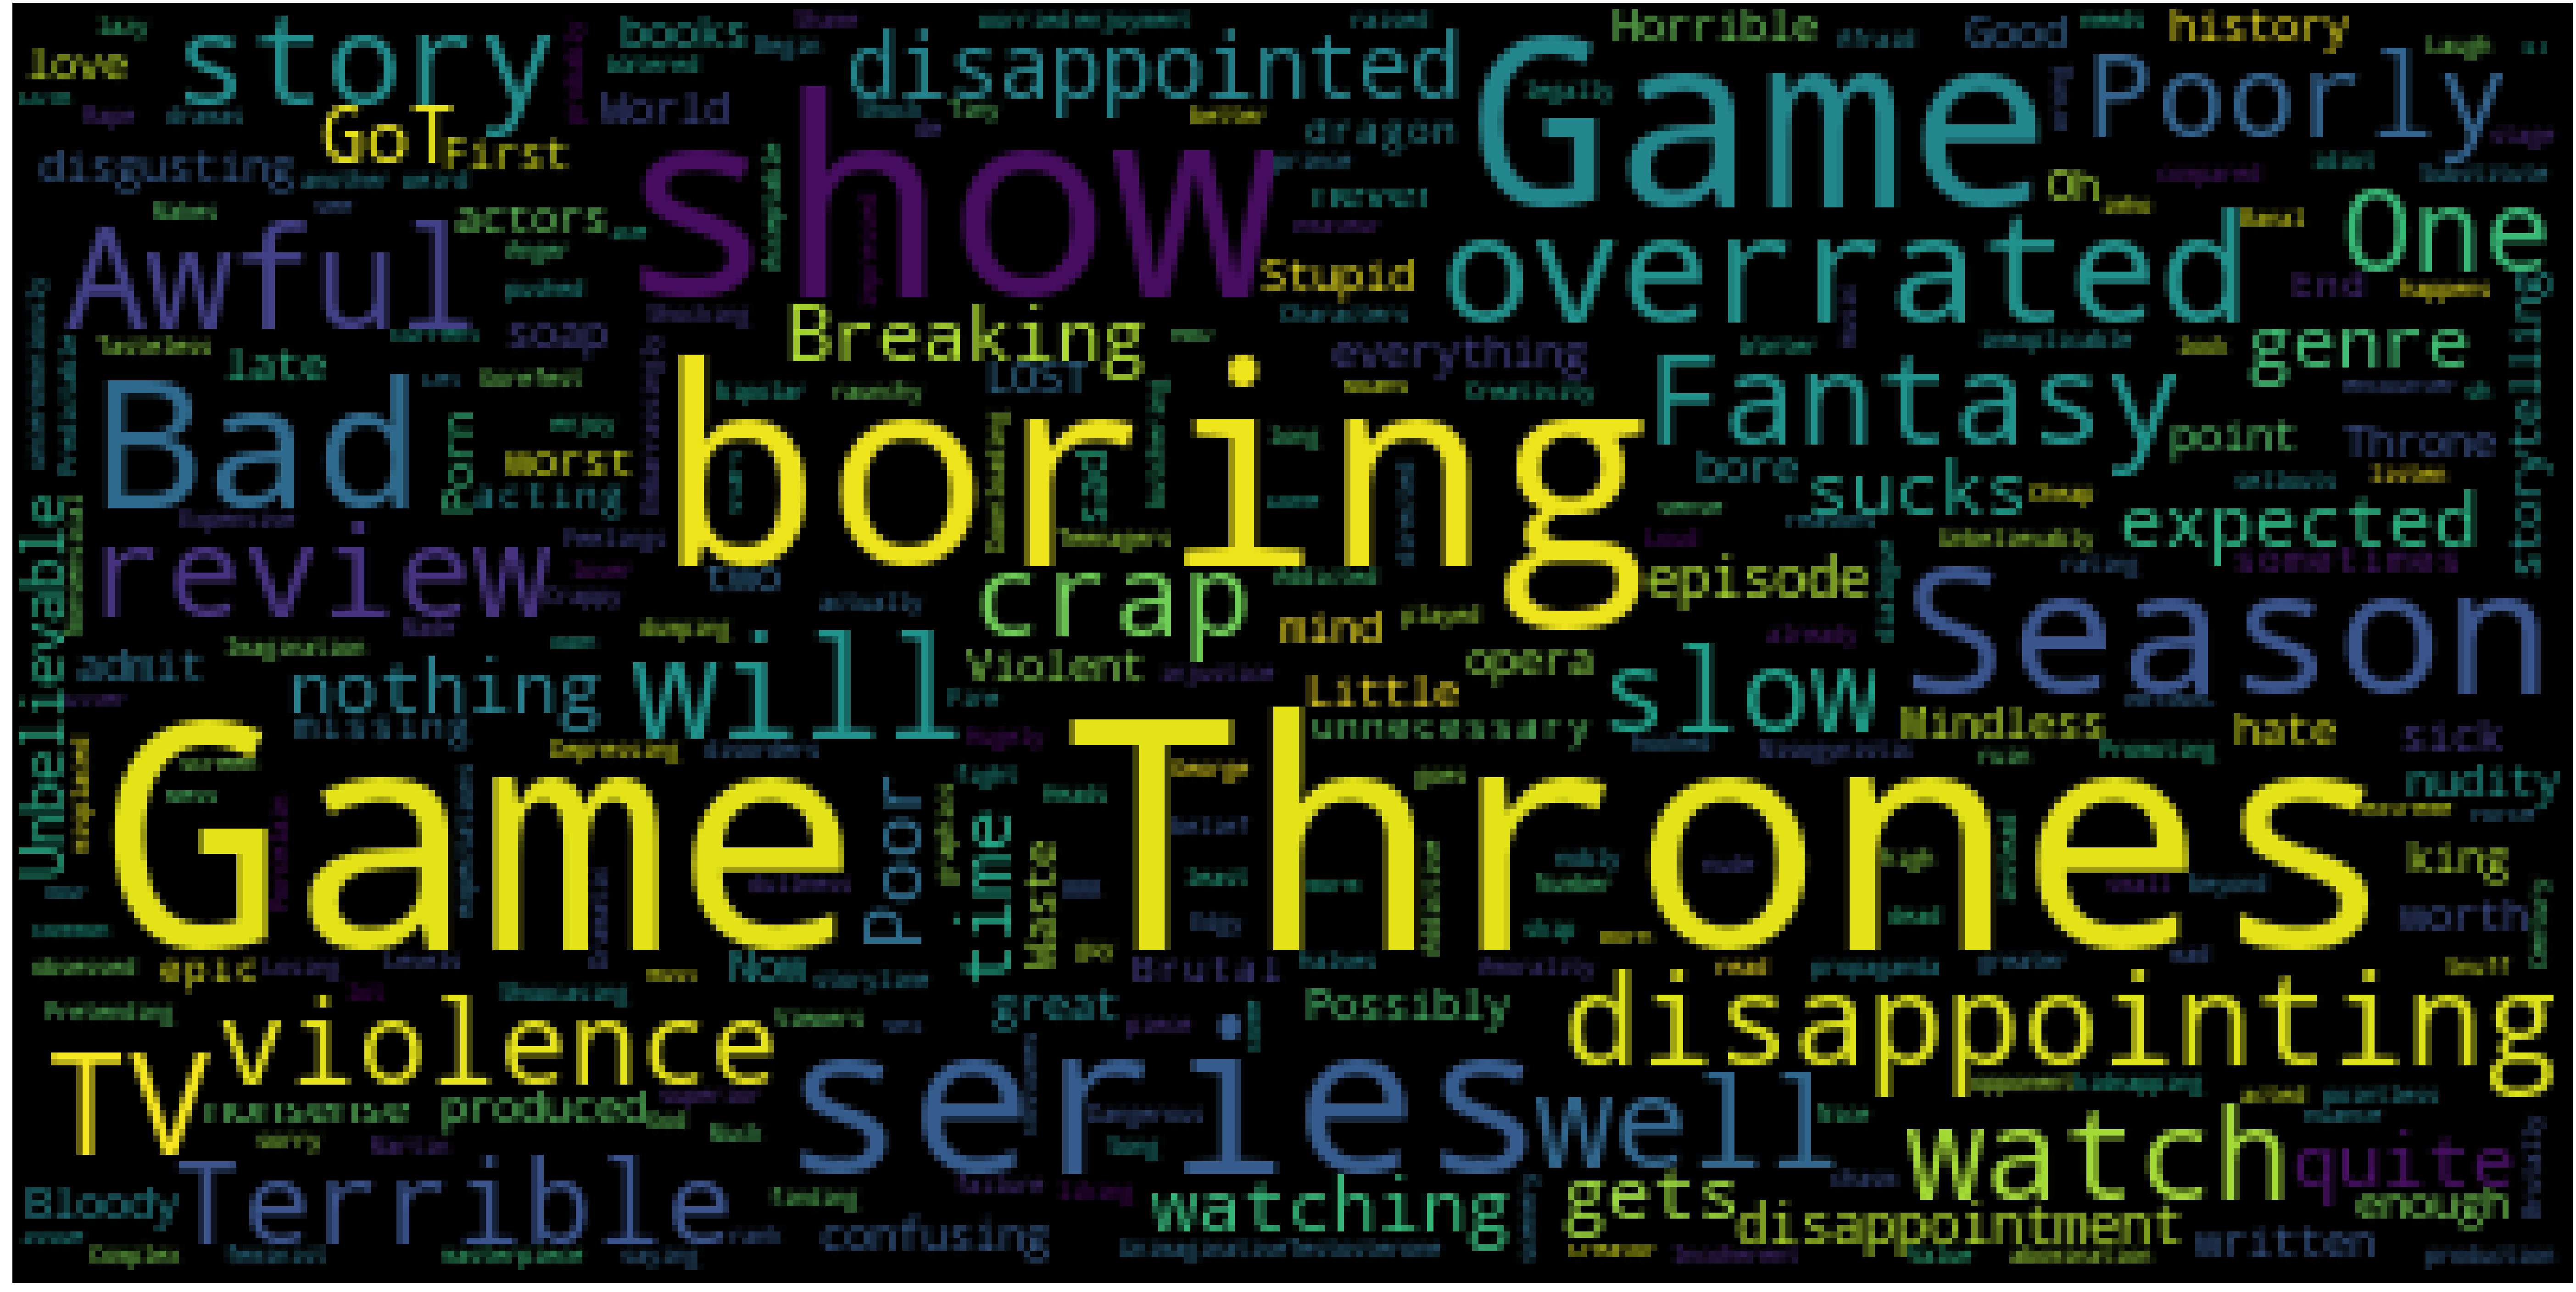

In [125]:
wc(negative_reviews['Review'],'black','Most Used Words')

In [126]:
import string
def text_process(review):
    nopunc=[word for word in review if word not in string.punctuation]
    nopunc=''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [127]:
test_df=test_df.dropna(axis=0,how='any')
rating_class = test_df[(test_df['Rating'] == 1) | (test_df['Rating'] == 10)]
X_review=rating_class['Review']
y=rating_class['Rating']

In [128]:
from sklearn.feature_extraction.text import CountVectorizer
bow_transformer=CountVectorizer(analyzer=text_process).fit(X_review)

In [129]:
X_review = bow_transformer.transform(X_review)

In [130]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_review, y, test_size=0.3, random_state=101)

In [131]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [132]:
predict=nb.predict(X_test)

In [133]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, predict))
print('\n')
print(classification_report(y_test, predict))

[[ 14  26]
 [ 14 159]]


             precision    recall  f1-score   support

        1.0       0.50      0.35      0.41        40
       10.0       0.86      0.92      0.89       173

avg / total       0.79      0.81      0.80       213



In [137]:
rating_positive=test_df['Review'][6]
rating_positive

' This TV series is magnificent!'

In [139]:
rating_postive_transformed = bow_transformer.transform([rating_positive])
nb.predict(rating_postive_transformed)[0]

10.0

In [135]:
rating_negative=test_df['Review'][54]
rating_negative

' disgusting, overrated, pointless'

In [136]:
rating_negative_transformed = bow_transformer.transform([rating_negative])
nb.predict(rating_negative_transformed)[0]

1.0